In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting Libraries
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# ML and data libraries
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import scipy
import pandas as pd 

# System libraries
import pickle 

# Custom Libraries
# import util/image_util.py
# import models/PCA/spectral_analysis.py

import sys
sys.path.append('../../util/')
from image_util import *

import spectral_analysis as sa
#from spectral_analysis import plot_eigens

In [2]:
sf = pickle.load(open("../../data/SF.pickle", "rb"))
sf_images = save_raw_images("../../data/SF_image/SF_image.pickle", sf, 100)
save_raw_image_vects("../../data/SF_image/SF_image_vec.pickle", sf_images)

(array([[3.45691816, 1.44038257, 3.45691816, ..., 0.        , 0.        ,
         0.        ],
        [3.54139   , 0.59023167, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [2.55662934, 1.02265174, 1.02265174, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [2.52979163, 0.53258771, 0.26629386, ..., 0.        , 0.        ,
         0.        ],
        [2.52238618, 0.63059654, 0.63059654, ..., 0.        , 0.        ,
         0.        ],
        [1.1987533 , 0.26638962, 0.66597405, ..., 0.        , 0.        ,
         0.        ]]), array([0., 0., 0., ..., 1., 1., 1.]))

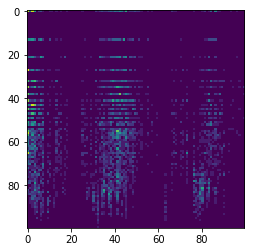

In [3]:
plt.imshow(sf_images[0]['image'])

In [4]:
with open("../../data/SF_image/SF_image_vec.pickle", 'rb') as f:
    data = pickle.load(f)
sf_image_vects = data[0]
sf_image_class = data[1]

In [5]:
# Parameterization

im_size = 100



In [6]:
# PCA

n_components = 400
pca = PCA(n_components=n_components).fit(sf_image_vects)
X_new = pca.transform(sf_image_vects)

In [7]:
# Analyzing New Eigenspace

# Extracting the PCA components ( eignevalues )
#eigen_values = pca.components_.reshape(n_components, im_size, im_size)


In [8]:
X_new.shape

(1927, 400)

In [9]:
new_images = np.reshape(X_new, (-1,20,20))
save_data = (new_images, sf_image_class)
with open('../../data/pca_images.pickle','wb') as f:
    pickle.dump(save_data, f)

In [10]:
sf_image_class.shape

(1927,)